**<h2>TIME SERIES ANALYSIS (AMAZON REVIEW)</h2>**

----
----

This data repository can be found [here](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon/links.html )

<br>
A pair of product categories have been chosen for this project.

*   Home and Kitchen
*   Grocery and Gourmet Food

The datasets considered for this project are the **5-core** dataset and the **metadata** of each category.

The datasets have already been processed, combined and saved.

<br>

**<h4>Business Objectives :</h4>**
*   Perform trend and seasonality analysis to predict and forecast customer frequency of buying new products.

<br>

**<h4> Project Approach :</h4>**
*   Use features such as reviewtime to convert the dataset into a time series format
*   Forecast trends via Time Series Analysis of the new dataset.

----

# Libraries :

In [ ]:
# Installing libraries - langdetect, pycountry
!pip install langdetect pycountry emoji pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 81.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.2 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=1b56c36261abdc04e6e4592c002279089bad7cbebcb96ac8d051077b6845f3cb
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=8e29e0edc6094cc80f255e393781fa07cebd2d23b5f1b147ca9d90eb5853e552
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d7

In [ ]:
# Importing libraries to handel data sets
import csv                                              # For csv files
import json                                             # For json files
import gzip                                             # For compressed files

# Libraries to handle datetime data
import datetime as dt                                   # To manipulate dates

# Libraries for data manipulation and visualization
import ast                                              # Abstract Syntax Trees (ast) package
import numpy as np                                      # To manipulate arrays
import pandas as pd                                     # To manipulate dataframes
from scipy import sparse                                # To manipulate spare matrices

import matplotlib.pyplot as plt                         # To create charts and graphs
from matplotlib.patches import ConnectionPatch          # For graphs
import seaborn as sns                                   # To visualize
from wordcloud import WordCloud,STOPWORDS               # To create world cloud graphs
import emoji                                            # For emojis

# Libraries to process text data
import re                                               # To apply regular expressions over string data
import string
import pycountry                                        # To convert ISO codes of languages into subjective strings

from langdetect import detect, DetectorFactory          # To detect language of the text
DetectorFactory.seed = 0                                # Setting seed value to enforce consistent results (Language detection is non-deterministic)

import spacy                                            # To create NLP objects
spacy.cli.download('en_core_web_lg')                    # Loading 'english' model trained on large datasets
nlp=spacy.load('en_core_web_lg')                        # Creating a spacy instance

# Libraries for transforming data
from sklearn.preprocessing import StandardScaler,MinMaxScaler                             # To scale the numeric data
from sklearn.model_selection import train_test_split                                      # To split data into train and test sets

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer               # To vectorize text data
from sklearn.preprocessing import MultiLabelBinarizer,LabelBinarizer                      # To encode and/or binarize data

# Libraries for statistical testing
import scipy.stats as sts

# Libraries for building models
from sklearn.multiclass import OneVsRestClassifier                    # To handle multilabeled target variables

from sklearn.linear_model import LogisticRegression                   # For classification of binary classes
from sklearn.naive_bayes import MultinomialNB                         # For classification
from sklearn.linear_model import SGDClassifier                        # For classification

from sklearn.cluster import KMeans                                    # For clustering

import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Libraries for evaluating models
from sklearn.metrics import silhouette_score                          # To calculate similarity of datapoints within a cluster
from sklearn.metrics import confusion_matrix,classification_report    # To get classification model reports
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Libraries to handel warnings
import warnings
warnings.filterwarnings('ignore')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# pipeline library

In [ ]:
# Spacy pipeline
print('Original pipeline : ',nlp.pipe_names)

#nlp.disable_pipes()                                 # type in function to disable in the pipeline

print('Amended pipeline :',nlp.pipe_names)

Original pipeline :  ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
Amended pipeline : ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


# Reading saved data :

In [ ]:
# Function to read a string as a literal
def read_string_literal(strg) :
  try :
    return ast.literal_eval(strg)
  except :
    return pd.NaT

# Function to convert column to datetime object
def date_time_column(col,format_date='%Y-%m-%d') :
  return pd.to_datetime(col,format=format_date)

#### Reviews data :

In [ ]:
# Reading reviews in chunks : CSV
dict1={}
convert_cols={'reviewTime':date_time_column,'pos_words':read_string_literal,'neg_words':read_string_literal,'categories':read_string_literal}
i=0
with pd.read_csv('/content/drive/MyDrive/capstone_project_data.csv',chunksize=50000,converters=convert_cols) as reader :
  reader
  for chunk in reader :
    dict1[i]=chunk
    i+=1

data=pd.concat(dict1,axis=0)
data=data.droplevel(level=0)

display(pd.concat([data.head(3),data.tail(3)],axis=0))

,reviewerID,asin,reviewerName,reviewText,overall,reviewTime,Positive_feedback,Total_feedback,helpfulness_ratio,price,...,neg_words,no_pos,no_neg,total_words,polarity,sentiment,weekday,brand,categories,set
0,APYOBQE6M18AA,0615391206,Martin Schwartz,My daughter wanted this book and the price on ...,5.0,2013-10-19,0,0,0.000000,17.29,...,[],3.0,0.0,14.0,0.21,Positive,Saturday,Zoku,"[Home & Kitchen, Kitchen & Dining, Kitchen Ute...",hk
1,A1JVQTAGHYOL7F,0615391206,Michelle Dinh,I bought this zoku quick pop for my daughterr ...,5.0,2014-06-18,0,0,0.000000,17.29,...,[],2.0,0.0,9.0,0.22,Positive,Wednesday,Zoku,"[Home & Kitchen, Kitchen & Dining, Kitchen Ute...",hk
2,A3UPYGJKZ0XTU4,0615391206,mirasreviews,There is no shortage of pop recipes available ...,4.0,2013-05-05,26,27,0.962963,17.29,...,"[shortage, scream, freeze, limited, gimmicky, ...",21.0,8.0,200.0,0.07,Neutral,Sunday,Zoku,"[Home & Kitchen, Kitchen & Dining, Kitchen Ute...",hk
702932,ASEBX8TBYWQWA,B00KCJRVO2,"Steven I. Ramm ""Steve Ramm &#34;Anything Phon...","While I usually review CDs and DVDs, as well a...",5.0,2014-07-01,1,1,1.000000,13.00,...,"[allergic, intolerance, concerned]",12.0,3.0,158.0,0.06,Neutral,Tuesday,Enjoy,[Grocery & Gourmet Food],ggf
702933,ANKQGTXHREOI5,B00KCJRVO2,Titanium Lili,My son and I enjoyed these oatmeal packets. H...,4.0,2014-07-04,0,1,0.000000,13.00,...,[junk],10.0,1.0,48.0,0.19,Positive,Friday,Enjoy,[Grocery & Gourmet Food],ggf
702934,A2CF66KIQ3RKX3,B00KCJRVO2,Vivian Deliz,I like to eat oatmeal i the mornings. I usuall...,4.0,2014-07-11,0,0,0.000000,13.00,...,"[suspect, cheap]",5.0,2.0,42.0,0.07,Neutral,Friday,Enjoy,[Grocery & Gourmet Food],ggf


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702935 entries, 0 to 702934
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   reviewerID         702935 non-null  object        
 1   asin               702935 non-null  object        
 2   reviewerName       696448 non-null  object        
 3   reviewText         702935 non-null  object        
 4   overall            702935 non-null  float64       
 5   reviewTime         702935 non-null  datetime64[ns]
 6   Positive_feedback  702935 non-null  int64         
 7   Total_feedback     702935 non-null  int64         
 8   helpfulness_ratio  702935 non-null  float64       
 9   price              632353 non-null  float64       
 10  language           702935 non-null  object        
 11  cleanText          702840 non-null  object        
 12  pos_words          702840 non-null  object        
 13  neg_words          702840 non-null  object  

In [ ]:
data.isnull().sum()

reviewerID               0
asin                     0
reviewerName          6487
reviewText               0
overall                  0
reviewTime               0
Positive_feedback        0
Total_feedback           0
helpfulness_ratio        0
price                70582
language                 0
cleanText               95
pos_words               95
neg_words               95
no_pos                  95
no_neg                  95
total_words             95
polarity                95
sentiment                0
weekday                  0
brand                    0
categories               0
set                      0
dtype: int64

#### Metadata data :

In [ ]:
# Reading meta in chunks : CSV
dict1={}
convert_cols={'categories':ast.literal_eval}
i=0
with pd.read_csv('/content/drive/MyDrive/capstone_project_meta_data.csv',chunksize=50000,converters=convert_cols) as reader :
  reader
  for chunk in reader :
    dict1[i]=chunk
    i+=1

meta_data=pd.concat(dict1,axis=0)
meta_data=meta_data.droplevel(level=0)

display(pd.concat([meta_data.head(3),meta_data.tail(3)],axis=0))

,asin,categories,title,description,price,brand,extracted_brand
0,0076144011,[Home & Kitchen],"Ninjas, Piranhas, and Galileo",NaN,NaN,Galileo,Galileo
1,0130350591,"[Home & Kitchen, Kitchen & Dining, Dining & En...",Le Creuset Kiwi (Green) Butter Dish Stoneware,Each piece of Le Creuset dinnerware is crafted...,NaN,Le Creuset,Le Creuset
2,0307394530,"[Home & Kitchen, Artwork, Posters & Prints]",Martha Stewart's Wedding Cakes,Of all the decisions that go into planning a w...,14.99,Random House,Martha Stewart
608745,B00LOXAZ1Q,[Grocery & Gourmet Food],"Sour Punch Blue Raspberry Bite, 5 Ounce Bag --...",Sour Punch candy is the brand of mouth waterin...,16.55,Sour Punch,Sour Punch
608746,B00LOZ7F0S,[Grocery & Gourmet Food],Organic Mexican Vanilla,"Our Vanilla Extract made from\nPremium, Organi...",NaN,Premium,Premium
608747,B00LQWKDBM,[Grocery & Gourmet Food],Mrs. Grass Onion Soup and Dip Mix,NaN,NaN,Unknown,Unknown


In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608748 entries, 0 to 608747
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   asin             608748 non-null  object 
 1   categories       608748 non-null  object 
 2   title            606850 non-null  object 
 3   description      549310 non-null  object 
 4   price            398320 non-null  float64
 5   brand            608745 non-null  object 
 6   extracted_brand  608745 non-null  object 
dtypes: float64(1), object(6)
memory usage: 37.2+ MB


In [ ]:
meta_data.isnull().sum()

asin                    0
categories              0
title                1898
description         59438
price              210428
brand                   3
extracted_brand         3
dtype: int64

# Functions used to create time series models :

In [ ]:
# Function to verify continuity of dates
def check_dates(data) :
  # First and last dates in the column
  d_start=data.index[0].date()
  d_end=data.index[-1].date()
  print('Start date : ',d_start,'\nEnd date   : ',d_end)

  # Date range
  date_range=pd.date_range(start=d_start,end=d_end,freq='D')       # freq = 'D' since it's daily data

  # Date check
  diff=date_range.difference(data.index)

  if len(diff)==0 :
    print('\nThere are no missing dates in the dataset.')
  else :
    print('\nNo. of missing dates : %d\n\nThese dates are : ' %(len(diff)))
    print(diff)

  # Checking the order of dates
  date_range2=date_range.difference(diff)      # dates without missing dates

  w,wrong=[],[]
  for i in range(len(data)) :
    if data.index[i]==date_range2[i] :
      pass
    else :
      w.append(i)
      wrong.append(data.index[i])

  unordered_dates=pd.Series(wrong,index=w)
  if len(unordered_dates)==0 :
    print('\nThe dates are in order, regardless of the missing dates.')
  else :
    print('\nThe dates are not in order. There are %d unordered dates.' %len(unordered_dates))
    return unordered_dates

# Function to perform ADF Test
def stationary_check(data,alpha=0.05) :
  a=0
  pval=adfuller(data)[1]

  if pval<alpha :
    return 'The data is stationary. Modelling can be done on it.',a
  else :
    a+=1
    return 'The data is not stationary. Modelling cannot be done until data is made stationary.',a

# Function to split data
def ts_train_test_split(ts,train_ratio=0.8) :
  cutoff=int(np.ceil(len(ts)*train_ratio))

  train=ts.iloc[0:cutoff]
  test=ts.iloc[cutoff:]

  return train,test

# Function for correlograms
def correlograms(data,lags) :
  # Plotting ACF and PACF correlograms
  plt.subplots(2,1,figsize=(6,5))
  plt.subplots_adjust(hspace=0.5)

  ax1=plt.subplot(211)
  plot_acf(data.values,lags=lags,ax=ax1,title='ACF')     # lag 45
  plt.xlabel('Lags')
  plt.ylabel('Correlation')
  ax1.spines[['top','right']].set_visible(False)

  ax2=plt.subplot(212)
  plot_pacf(data.values,lags=lags,ax=ax2,title='PACF')   # lag 20
  plt.xlabel('Lags')
  plt.ylabel('Correlation')
  ax2.spines[['top','right']].set_visible(False)

  plt.show()

# Function to decompose time series data for trend, seasonality and residuals
def ts_decomposition(ts,period) :
  # Seasonal Decomposition
  decomposition=seasonal_decompose(ts,period=period)     # yearly

  # The componets
  d_trend=decomposition.trend
  d_seasonality=decomposition.seasonal
  d_residuals=decomposition.resid

  # Plotting the components
  R,C,P=4,1,1
  labels=['Original','Trend','Seasonality','Residuals']
  colours=['blue','darkgreen','orange','maroon']

  plt.subplots(R,C,figsize=(15,12))
  for i in [ts,d_trend,d_seasonality,d_residuals] :
    plt.subplot(R,C,P)
    plt.plot(i,label=labels[P-1],color=colours[P-1])
    plt.grid()
    plt.legend(loc='upper right',facecolor='lightgrey')
    P+=1
  plt.suptitle('Components of Time series',fontsize=15,fontweight='bold')
  plt.show()

# Function to forecast trends
def ts_forecast(model,subset,days) :
  from_date=subset.index[-1].date() + dt.timedelta(days=1)
  to_date=subset.index[-1].date() + dt.timedelta(days=days+1)
  dates=pd.date_range(from_date,to_date,freq='D')

  forecasted=model.forecast(steps=days+1)
  forecasted.index=dates

  df=pd.DataFrame(pd.concat([subset,forecasted],axis=0),columns=['score'])
  df['value']=np.where(df.index.date<from_date,'actual','forecasted')

  return df

# Home & Kitchen :

### Positive forecasting :

In [ ]:
# Filtering data by category and sentiment type, then grouping them by reviewTime
hk_pos=data[data['set'].eq('hk') & data['sentiment'].eq('Positive')].groupby('reviewTime')['polarity'].mean()
hk_pos

reviewTime
2000-05-02    0.190000
2000-05-03    0.250000
2000-05-04    0.265000
2000-05-06    0.160000
2000-05-09    0.240000
                ...   
2014-07-19    0.307941
2014-07-20    0.317412
2014-07-21    0.288375
2014-07-22    0.296190
2014-07-23    0.271000
Name: polarity, Length: 3848, dtype: float64

In [ ]:
# Verifying the continuity of dates
check_dates(data=hk_pos)

Start date :  2000-05-02 
End date   :  2014-07-23

No. of missing dates : 1348

These dates are : 
DatetimeIndex(['2000-05-05', '2000-05-07', '2000-05-08', '2000-05-10',
               '2000-05-11', '2000-05-13', '2000-05-14', '2000-05-15',
               '2000-05-16', '2000-05-18',
               ...
               '2006-09-23', '2006-09-27', '2006-10-07', '2006-10-13',
               '2006-10-15', '2006-10-17', '2006-11-19', '2006-11-27',
               '2006-12-04', '2007-02-28'],
              dtype='datetime64[ns]', length=1348, freq=None)

The dates are in order, regardless of the missing dates.


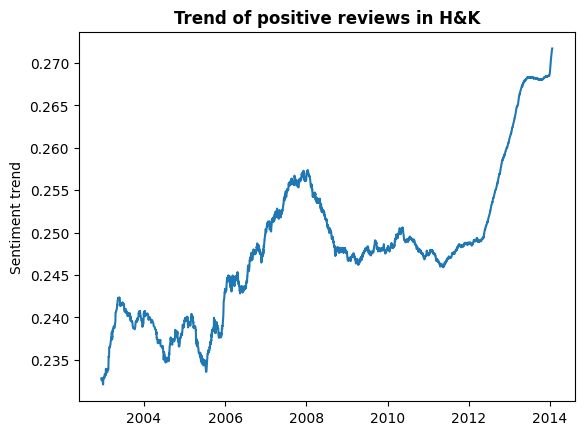

In [ ]:
# Ploting the yearly trend of sentiment
z=seasonal_decompose(hk_pos,period=365)

plt.plot(z.trend)
plt.ylabel('Sentiment trend')
plt.title('Trend of positive reviews in H&K',fontweight='bold')
plt.show()

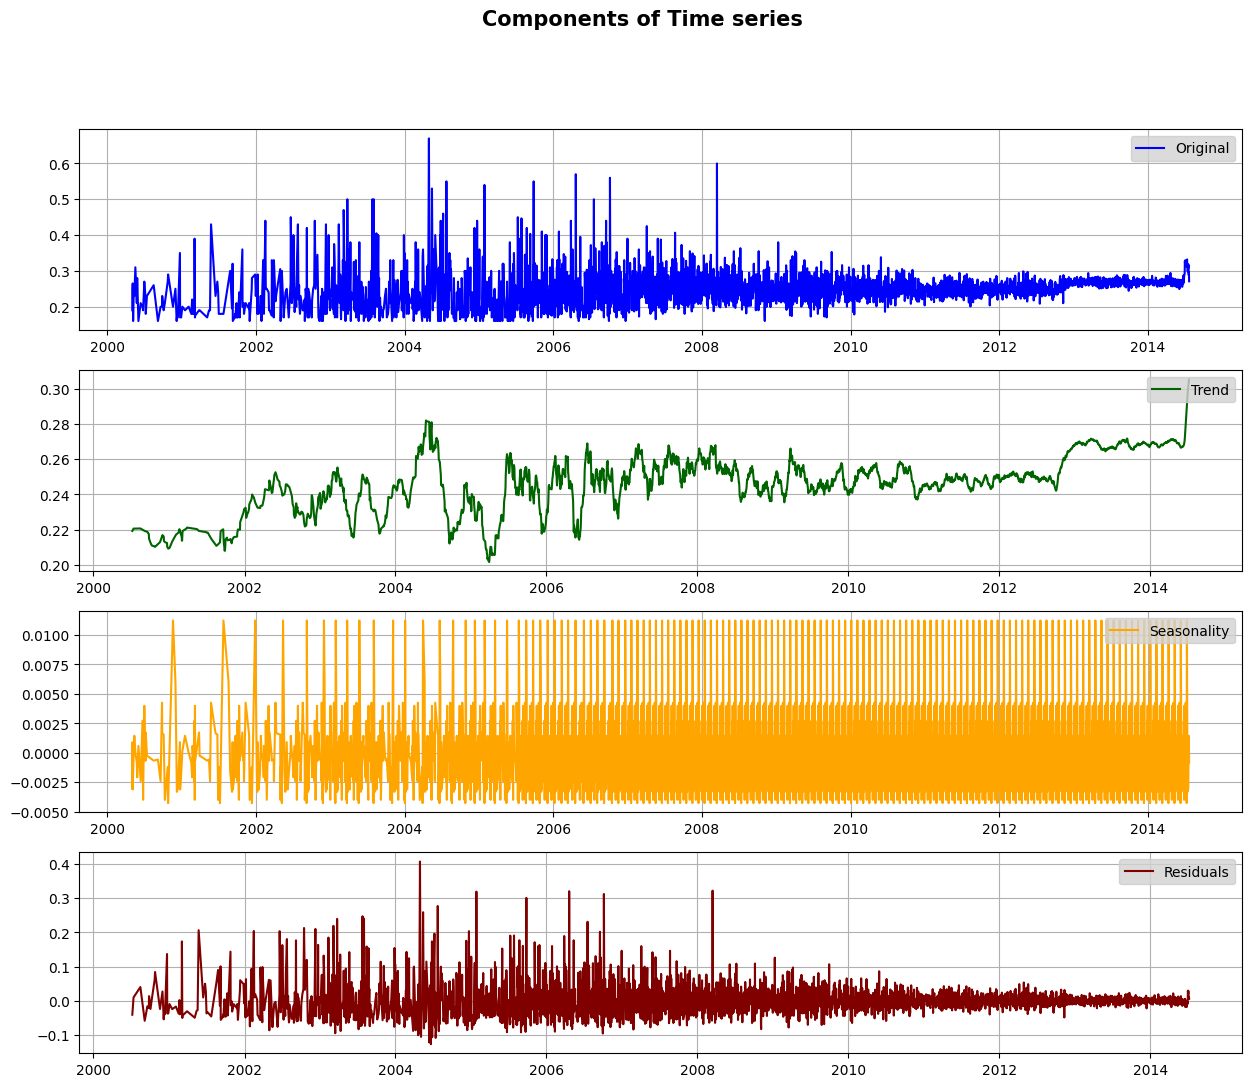

In [ ]:
# Visualizing components of the time series data : monthly
ts_decomposition(hk_pos,period=30)

In [ ]:
# Splitting the data into train and test
train,test=ts_train_test_split(hk_pos,0.9)

In [ ]:
# Stationarity check
result,a=stationary_check(train,alpha=0.05)
result

'The data is stationary. Modelling can be done on it.'

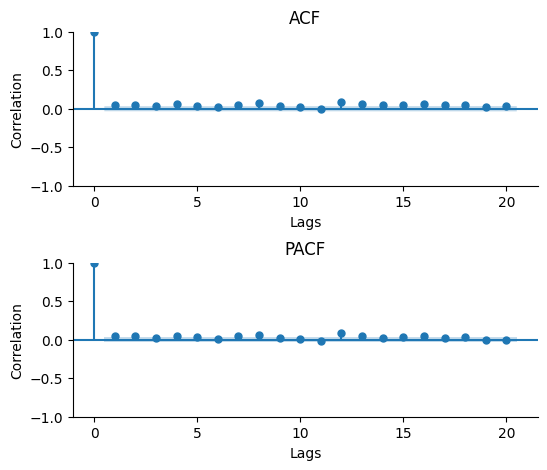

In [ ]:
# Plotting the correlograms to find p,q values
correlograms(train,lags=20)

In [ ]:
# Auto arima to set optimal values of p,d,q and P,D,Q
m1 = auto_arima(train ,start_p=0,max_p=2,start_q=0, max_q=2,
                start_P=1,max_P=2,start_Q=1,max_Q=2,
                m=12, seasonal=True, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-9492.385, Time=14.71 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-9473.462, Time=1.55 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-10486.228, Time=8.98 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-11806.879, Time=21.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-9475.461, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-11797.097, Time=5.79 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-11805.094, Time=27.51 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-11804.935, Time=44.97 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-11806.544, Time=12.01 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-11803.379, Time=52.29 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-9488.740, Time=4.09 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-11802.039, Time=16.91 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=-11780.109, Time=20.62 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-10487.046, T

In [ ]:
# Building SARIMA model
p=0; q=1; d=1
P=0; Q=1; D=0
pos_model_hk = sm.tsa.statespace.SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()

print(pos_model_hk.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           polarity   No. Observations:                 3464
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                5906.592
Date:                            Mon, 02 Oct 2023   AIC                         -11807.184
Time:                                    04:47:23   BIC                         -11788.734
Sample:                                         0   HQIC                        -11800.596
                                           - 3464                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9882      0.002   -426.842      0.000      -0.993      -0.984
ma.S.L12       0.0595      0.012   

In [ ]:
# Predicting
pred = pos_model_hk.predict(start=0,end=len(test)-1)

In [ ]:
# Displaying actual and predicted values
result_ts=pd.DataFrame(test)
result_ts['predicted']=pred.values
result_ts.rename(columns={'polarity':'actual'},inplace=True)
result_ts

,actual,predicted
reviewTime,,
2013-07-05,0.254014,0.000000
2013-07-06,0.261480,0.190000
2013-07-07,0.271790,0.220002
2013-07-08,0.264623,0.235005
2013-07-09,0.261413,0.216244
...,...,...
2014-07-19,0.307941,0.235508
2014-07-20,0.317412,0.235237
2014-07-21,0.288375,0.237050


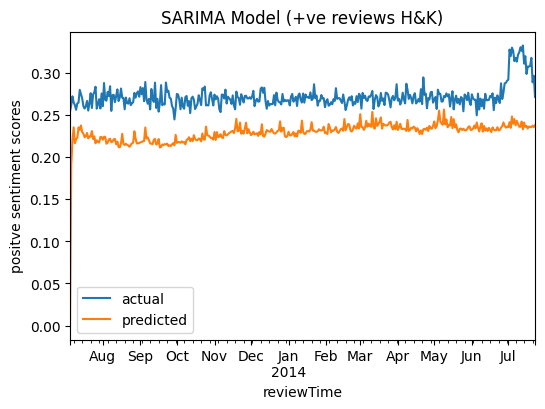

In [ ]:
# Plotting the results
result_ts.plot(kind='line',title='SARIMA Model (+ve reviews H&K)',ylabel='positve sentiment scores',figsize=(6,4))
plt.show()

In [ ]:
# Mean Square error of the model
mean_squared_error(result_ts['actual'],result_ts['predicted'])

0.0021198043750073775

,score,value
2000-05-02,0.190000,actual
2000-05-03,0.250000,actual
2015-07-23,0.266591,forecasted
2015-07-24,0.266591,forecasted


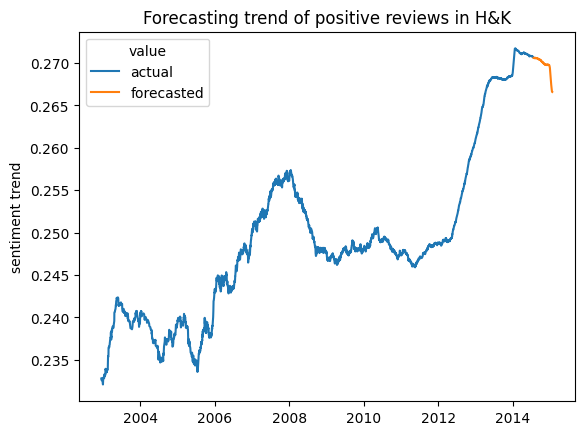

In [ ]:
# Forecasting trend
df=ts_forecast(pos_model_hk,subset=hk_pos,days=365)

display(pd.concat([df.head(2),df.tail(2)],axis=0))
print('\n\n')

decomp=seasonal_decompose(df['score'],period=365)

trend=pd.DataFrame(decomp.trend)
trend['value']=df['value']

sns.lineplot(data=trend,x=trend.index,y='trend',hue='value')
plt.ylabel('sentiment trend')
plt.title('Forecasting trend of positive reviews in H&K')
plt.show()

In [ ]:
# Forecasting trend by brand
brand='OXO'

subset=data[data['brand'].eq(brand) & data['sentiment'].eq('Positive')].groupby('reviewTime')['polarity'].mean()
subset

reviewTime
2000-05-04    0.300
2000-05-09    0.240
2000-05-12    0.230
2000-05-26    0.280
2000-07-07    0.180
              ...  
2014-07-15    0.325
2014-07-17    0.250
2014-07-18    0.170
2014-07-20    0.258
2014-07-22    0.160
Name: polarity, Length: 1874, dtype: float64

In [ ]:
# Appending forcasted values to original data and labelling them
df=ts_forecast(pos_model_hk,subset=subset,days=365)

display(pd.concat([df.head(2),df.tail(2)],axis=0))

,score,value
2000-05-04,0.300000,actual
2000-05-09,0.240000,actual
2015-07-22,0.266591,forecasted
2015-07-23,0.266591,forecasted


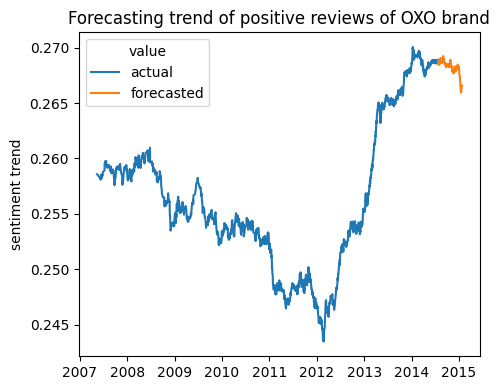

In [ ]:
# Plotting the trend of forecasted data
decomp=seasonal_decompose(df['score'],period=365)

trend=pd.DataFrame(decomp.trend)
trend['value']=df['value']

sns.lineplot(data=trend,x=trend.index,y='trend',hue='value')
plt.ylabel('sentiment trend')
plt.title('Forecasting trend of positive reviews of OXO brand')
plt.show()

**Observations :**
- In the Home and Kitchen category, positive reviews have an increasing trend.

- SARIMA model was used to forecast the trends in the number of reviews in this category.

- The trend is forecasted to decrease in the next quarter of 2014.

- The trend for the most reviewed brand, OXO,  appears to also drop for the next 90 days.
d of forecasted data

### Negative forecasting :

In [ ]:
# Filtering data by category and sentiment type, then grouping them by reviewTime
hk_neg=data[data['set'].eq('hk') & data['sentiment'].eq('Negative')].groupby('reviewTime')['polarity'].mean()
hk_neg

reviewTime
2000-05-02   -0.110000
2000-05-03   -0.020000
2000-05-07   -0.040000
2000-05-08   -0.120000
2000-05-10   -0.110000
                ...   
2014-07-18   -0.112727
2014-07-19   -0.105455
2014-07-20   -0.124500
2014-07-21   -0.066111
2014-07-22   -0.127059
Name: polarity, Length: 3886, dtype: float64

In [ ]:
# Verifying the continuity of dates
check_dates(data=hk_neg)

Start date :  2000-05-02 
End date   :  2014-07-22

No. of missing dates : 1309

These dates are : 
DatetimeIndex(['2000-05-04', '2000-05-05', '2000-05-06', '2000-05-09',
               '2000-05-11', '2000-05-12', '2000-05-13', '2000-05-14',
               '2000-05-15', '2000-05-16',
               ...
               '2007-04-14', '2007-07-18', '2007-08-02', '2007-10-29',
               '2007-11-08', '2008-02-25', '2008-09-17', '2008-10-23',
               '2008-11-13', '2009-04-30'],
              dtype='datetime64[ns]', length=1309, freq=None)

The dates are in order, regardless of the missing dates.


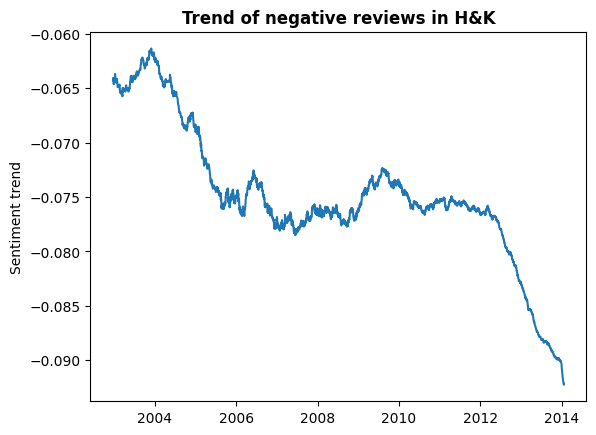

In [ ]:
# Ploting the yearly trend of sentiment
z=seasonal_decompose(hk_neg,period=365)

plt.plot(z.trend)
plt.ylabel('Sentiment trend')
plt.title('Trend of negative reviews in H&K',fontweight='bold')
plt.show()

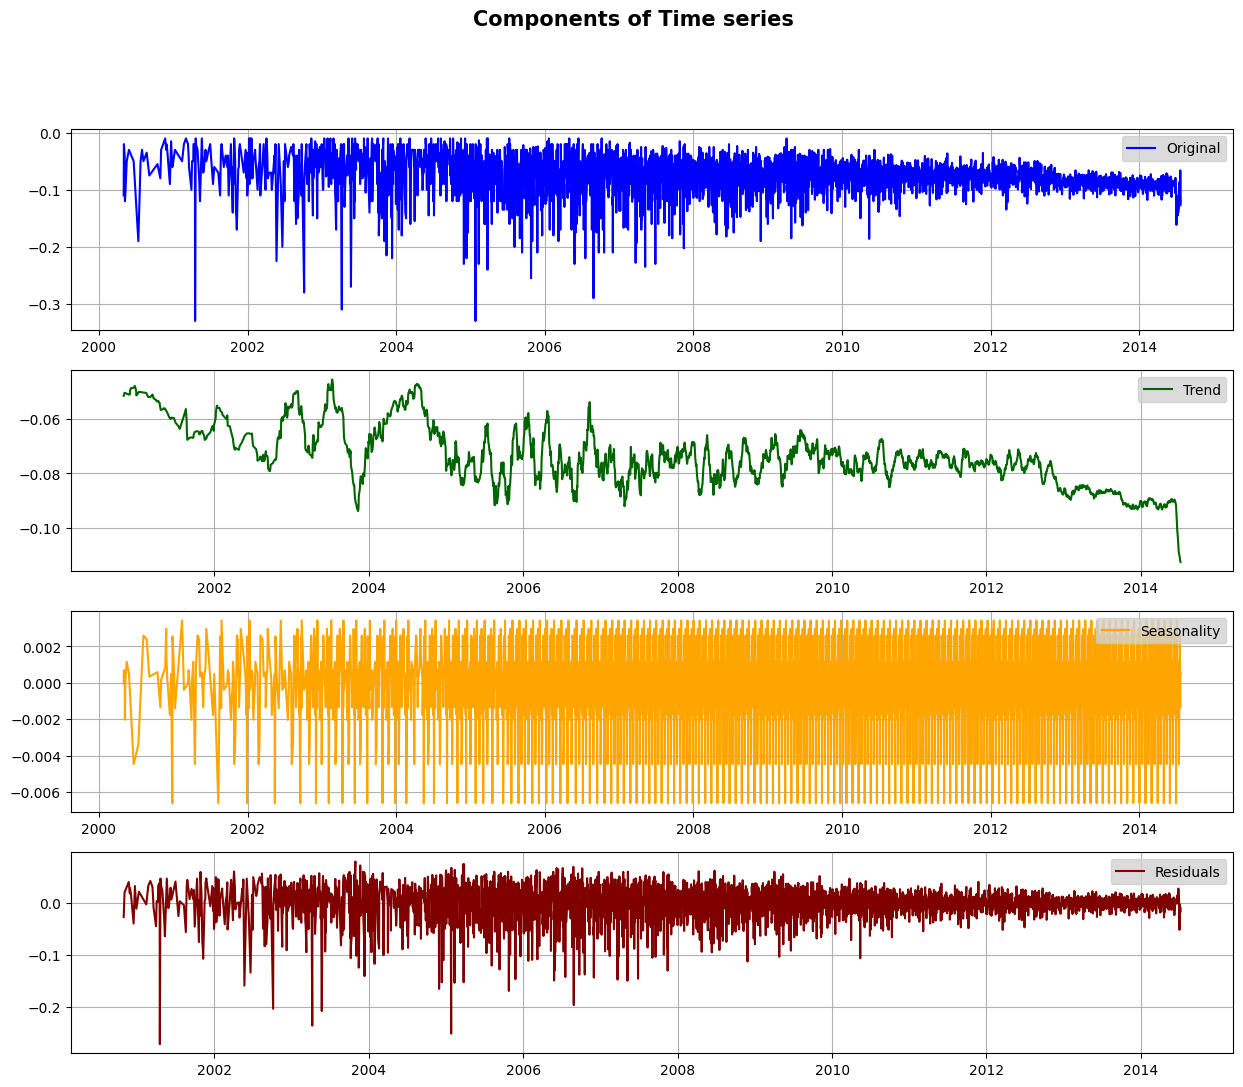

In [ ]:
# Visualizing components of the time series data : monthly
ts_decomposition(hk_neg,period=30)

In [ ]:
# Splitting the data into train and test
train2,test2=ts_train_test_split(hk_neg,0.9)

In [ ]:
# Stationarity check
result,a=stationary_check(train2,alpha=0.05)
result

'The data is stationary. Modelling can be done on it.'

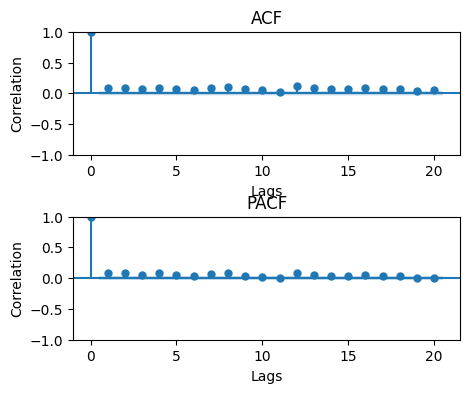

In [ ]:
# Plotting the correlograms to find p,q values
correlograms(train2,lags=20)

In [ ]:
# Auto arima to set optimal values of p,d,q and P,D,Q
m1 = auto_arima(train2,start_p=0,max_p=5,start_q=0, max_q=3,
                start_P=1,max_P=2,start_Q=1,max_Q=2,
                m=12, seasonal=True, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-11522.603, Time=8.00 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-11525.157, Time=1.63 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-12565.443, Time=7.77 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=18.87 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-11527.157, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-12567.372, Time=0.55 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-12565.443, Time=3.97 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-12563.449, Time=2.98 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=-12996.610, Time=0.50 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=-12994.907, Time=11.86 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=-12994.913, Time=5.61 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-12992.943, Time=5.07 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=-13234.696, Time=3.04 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=-13232.822, Time=6.06 

In [ ]:
# Building SARIMA model
p=4; q=2; d=1
P=0; Q=0; D=0

neg_model_hk = sm.tsa.statespace.SARIMAX(train2,order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()
print(neg_model_hk.summary())

                               SARIMAX Results                                
Dep. Variable:               polarity   No. Observations:                 3498
Model:               SARIMAX(4, 1, 2)   Log Likelihood                6991.875
Date:                Mon, 02 Oct 2023   AIC                         -13969.751
Time:                        04:53:42   BIC                         -13926.633
Sample:                             0   HQIC                        -13954.362
                               - 3498                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8771      0.414     -2.117      0.034      -1.689      -0.065
ar.L2         -0.0192      0.021     -0.895      0.371      -0.061       0.023
ar.L3          0.0008      0.019      0.039      0.9

In [ ]:
# Predicting
pred = neg_model_hk.predict(start=0,end=len(test2)-1)

In [ ]:
# Displaying actual and predicted values
result_ts=pd.DataFrame(test2)
result_ts['predicted']=pred.values
result_ts.rename(columns={'polarity':'actual'},inplace=True)
result_ts

,actual,predicted
reviewTime,,
2013-06-30,-0.089362,0.000000
2013-07-01,-0.097966,-0.110000
2013-07-02,-0.078451,-0.065746
2013-07-03,-0.102877,-0.057039
2013-07-04,-0.092105,-0.070870
...,...,...
2014-07-18,-0.112727,-0.067380
2014-07-19,-0.105455,-0.069116
2014-07-20,-0.124500,-0.069342


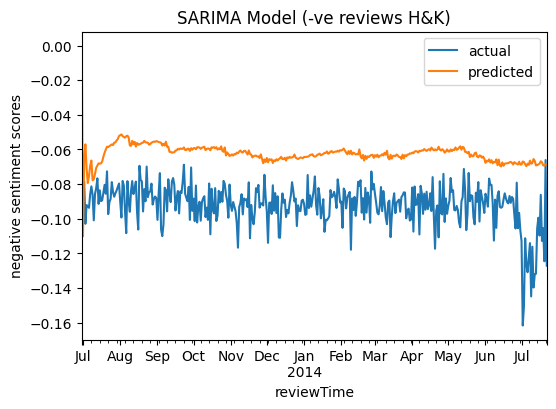

In [ ]:
# Plotting the results
result_ts.plot(kind='line',title='SARIMA Model (-ve reviews H&K)',ylabel='negative sentiment scores',figsize=(6,4))
plt.show()

,score,value
2000-05-02,-0.110000,actual
2000-05-03,-0.020000,actual
2015-07-22,-0.085315,forecasted
2015-07-23,-0.085315,forecasted


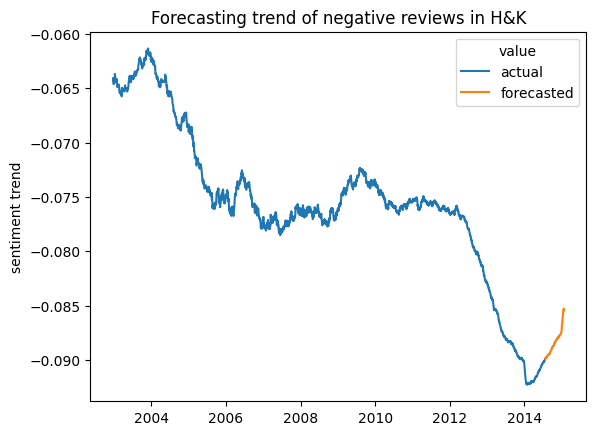

In [ ]:
# Forecasting trend
df=ts_forecast(neg_model_hk,subset=hk_neg,days=365)

display(pd.concat([df.head(2),df.tail(2)],axis=0))
print('\n\n')

decomp=seasonal_decompose(df['score'],period=365)

trend=pd.DataFrame(decomp.trend)
trend['value']=df['value']

sns.lineplot(data=trend,x=trend.index,y='trend',hue='value')
plt.ylabel('sentiment trend')
plt.title('Forecasting trend of negative reviews in H&K')
plt.show()

In [ ]:
# Forecasting for a brand
brand='OXO'

subset2=data[data['brand'].eq(brand) & data['sentiment'].eq('Negative')].groupby('reviewTime')['polarity'].mean()
subset2

reviewTime
2000-05-08   -0.12
2000-06-20   -0.05
2000-07-13   -0.19
2000-11-28   -0.02
2001-04-30   -0.02
              ... 
2014-07-14   -0.05
2014-07-15   -0.08
2014-07-16   -0.04
2014-07-21   -0.09
2014-07-22   -0.14
Name: polarity, Length: 1143, dtype: float64

In [ ]:
# Appending forcasted values to original data and labelling them
df2=ts_forecast(neg_model_hk,subset=subset2,days=365)

pd.concat([df2.head(2),df2.tail(2)],axis=0)

,score,value
2000-05-08,-0.120000,actual
2000-06-20,-0.050000,actual
2015-07-22,-0.085315,forecasted
2015-07-23,-0.085315,forecasted


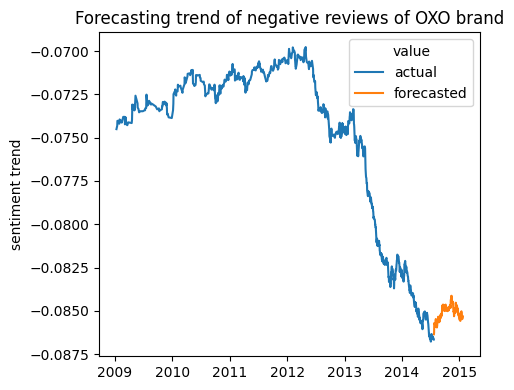

In [ ]:
# Plotting the trend of forecasted data
decomp=seasonal_decompose(df2['score'],period=365)

trend2=pd.DataFrame(decomp.trend)
trend2['value']=df2['value']

sns.lineplot(data=trend2,x=trend2.index,y='trend',hue='value')
plt.ylabel('sentiment trend')
plt.title('Forecasting trend of negative reviews of OXO brand')
plt.show()

**Observations :**
- In the Home and Kitchen category, negative reviews have an increasing trend.

- SARIMA model was used to forecast the trends in negative review count of the category. The trend is forecasted to decrease for next quarter in 2014.

- However for the most reviewed brand of this category, OXO, the trend in number of negative reviews appears to increase for the next 90 days into 2015.


# Grocery and Gourmet Food :

### Positive forecasting :

In [ ]:
# Filtering data by category and sentiment type, then grouping them by reviewTime
ggf_pos=data[data['set'].eq('ggf') & data['sentiment'].eq('Positive')].groupby('reviewTime')['polarity'].mean()
ggf_pos

reviewTime
2004-02-01    0.250000
2005-01-13    0.180000
2005-01-14    0.160000
2005-03-09    0.400000
2005-04-27    0.200000
                ...   
2014-07-19    0.293810
2014-07-20    0.332273
2014-07-21    0.229286
2014-07-22    0.285000
2014-07-23    0.160000
Name: polarity, Length: 2785, dtype: float64

In [ ]:
# Verifying the continuity of dates
check_dates(data=ggf_pos)

Start date :  2004-02-01 
End date   :  2014-07-23

No. of missing dates : 1041

These dates are : 
DatetimeIndex(['2004-02-02', '2004-02-03', '2004-02-04', '2004-02-05',
               '2004-02-06', '2004-02-07', '2004-02-08', '2004-02-09',
               '2004-02-10', '2004-02-11',
               ...
               '2008-08-24', '2008-09-11', '2008-10-07', '2008-10-12',
               '2008-10-19', '2008-12-13', '2008-12-17', '2010-01-19',
               '2010-06-11', '2010-08-15'],
              dtype='datetime64[ns]', length=1041, freq=None)

The dates are in order, regardless of the missing dates.


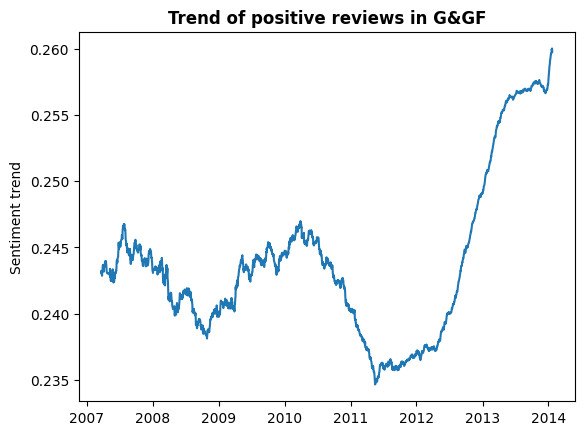

In [ ]:
# Ploting the yearly trend of sentiment
z=seasonal_decompose(ggf_pos,period=365)

plt.plot(z.trend)
plt.ylabel('Sentiment trend')
plt.title('Trend of positive reviews in G&GF',fontweight='bold')
plt.show()

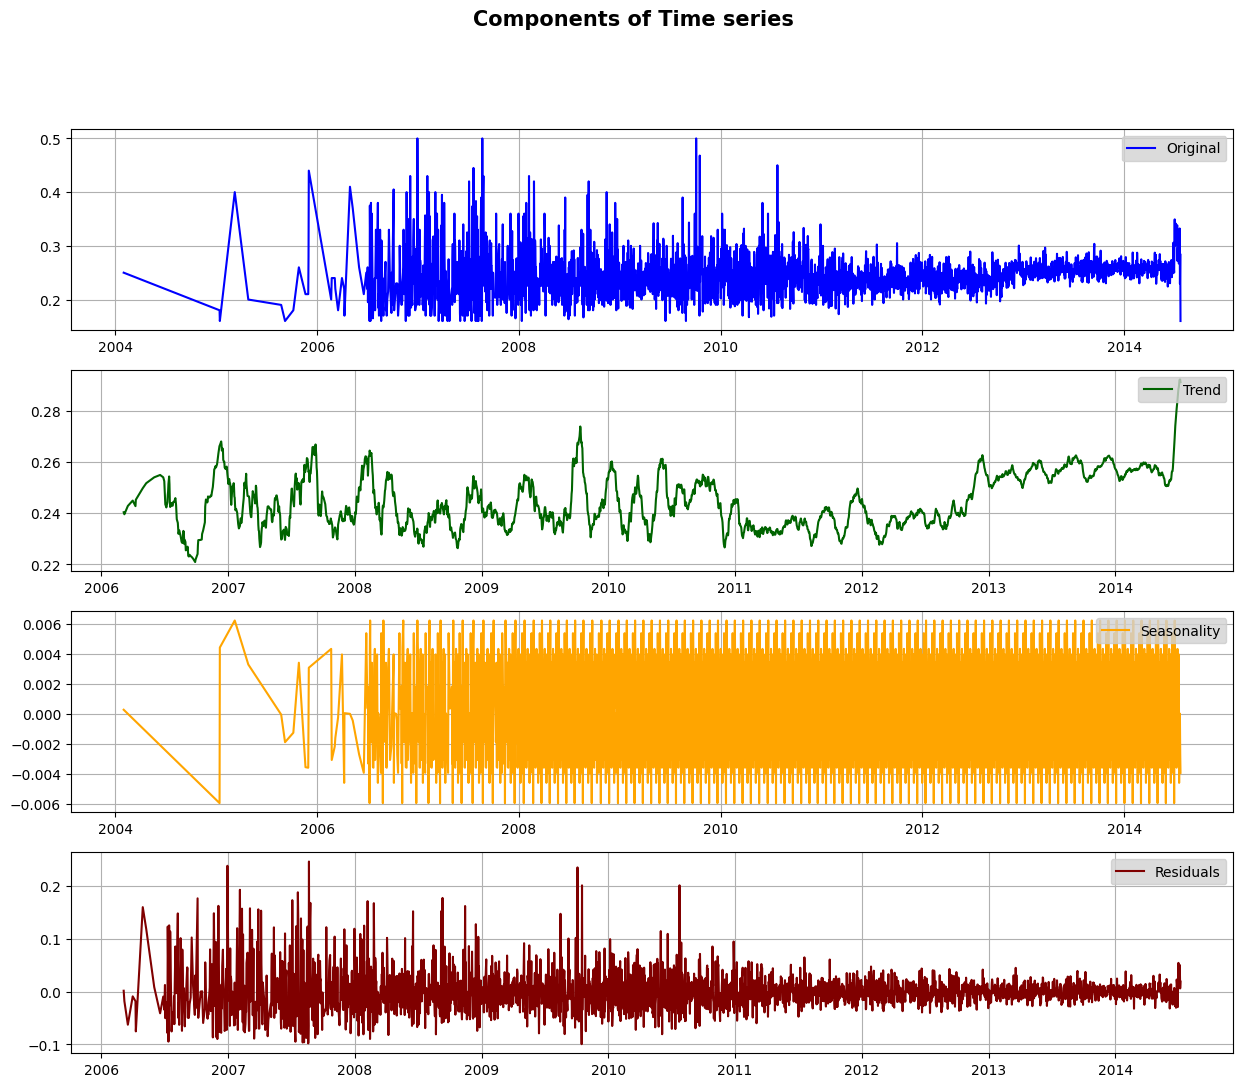

In [ ]:
# Visualizing components of the time series data : monthly
ts_decomposition(ggf_pos,period=30)

In [ ]:
# Splitting the data into train and test
train_g,test_g=ts_train_test_split(ggf_pos,train_ratio=0.9)

In [ ]:
# Stationarity check
result,a=stationary_check(train_g,alpha=0.05)
result

'The data is stationary. Modelling can be done on it.'

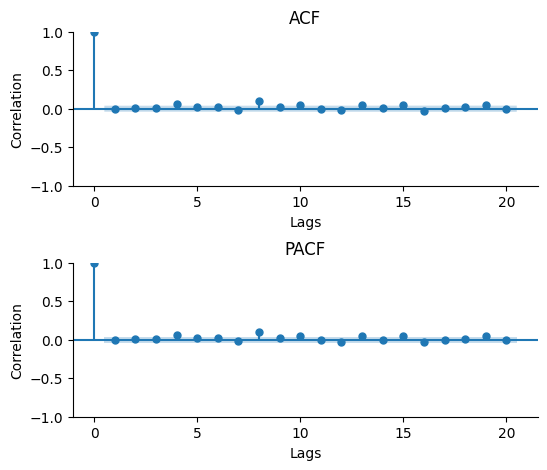

In [ ]:
# Plotting the correlograms to find p,q values
correlograms(train_g,lags=20)

In [ ]:
# Auto arima to set optimal values of p,d,q and P,D,Q
m1 = auto_arima(train_g,start_p=1,max_p=6,start_q=1, max_q=4,
                start_P=1,max_P=3,start_Q=1,max_Q=3,
                m=12, seasonal=True, trace=True,stationary=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=15.95 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-9085.580, Time=0.62 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-9082.163, Time=9.90 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-9082.145, Time=6.65 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=92.667, Time=0.12 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-9084.085, Time=5.09 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-9084.066, Time=1.33 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=12.45 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-9083.679, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-9083.677, Time=0.80 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-9081.668, Time=1.82 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 55.095 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:       

In [ ]:
# Building SARIMA model
p=1; q=1; d=0
P=0; Q=0; D=0

pos_model_ggf = sm.tsa.statespace.SARIMAX(train_g,order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()

print(pos_model_ggf.summary())

                               SARIMAX Results                                
Dep. Variable:               polarity   No. Observations:                 2507
Model:               SARIMAX(1, 0, 1)   Log Likelihood                4554.487
Date:                Mon, 02 Oct 2023   AIC                          -9102.974
Time:                        04:58:06   BIC                          -9085.494
Sample:                             0   HQIC                         -9096.629
                               - 2507                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   5.66e-06   1.77e+05      0.000       1.000       1.000
ma.L1         -0.9895      0.004   -258.314      0.000      -0.997      -0.982
sigma2         0.0015   2.26e-05     68.258      0.0

In [ ]:
# Predicting
pred = pos_model_ggf.predict(start=0,end=len(test_g)-1)

In [ ]:
# Displaying actual and predicted values
result_ts=pd.DataFrame(test_g)
result_ts['predicted']=pred.values
result_ts.rename(columns={'polarity':'actual'},inplace=True)
result_ts

,actual,predicted
reviewTime,,
2013-10-19,0.259318,0.000000
2013-10-20,0.258974,0.243985
2013-10-21,0.269091,0.212380
2013-10-22,0.257069,0.195059
2013-10-23,0.240469,0.246000
...,...,...
2014-07-19,0.293810,0.240671
2014-07-20,0.332273,0.242827
2014-07-21,0.229286,0.244484


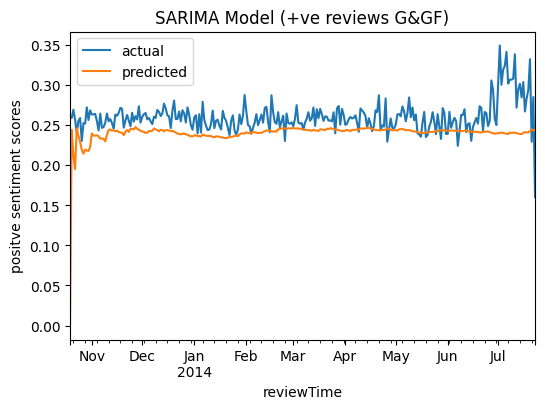

In [ ]:
# Plotting the results
result_ts.plot(kind='line',title='SARIMA Model (+ve reviews G&GF)',ylabel='positve sentiment scores',figsize=(6,4))
plt.legend(loc='best')
plt.show()

,score,value
2004-02-01,0.250000,actual
2005-01-13,0.180000,actual
2015-07-23,0.256028,forecasted
2015-07-24,0.256027,forecasted


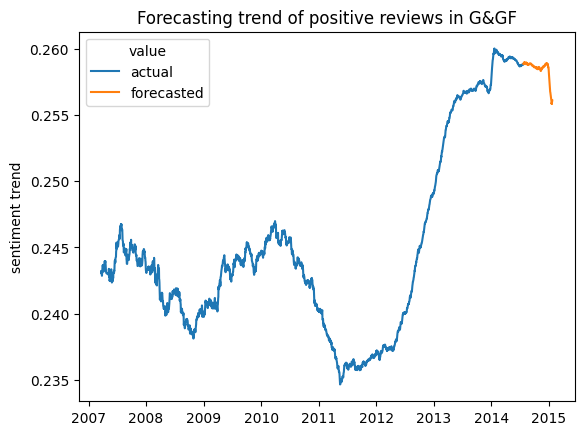

In [ ]:
# Forecasting trend
df=ts_forecast(pos_model_ggf,subset=ggf_pos,days=365)

display(pd.concat([df.head(2),df.tail(2)],axis=0))
print('\n\n')

decomp=seasonal_decompose(df['score'],period=365)

trend=pd.DataFrame(decomp.trend)
trend['value']=df['value']

sns.lineplot(data=trend,x=trend.index,y='trend',hue='value')
plt.ylabel('sentiment trend')
plt.title('Forecasting trend of positive reviews in G&GF')
plt.show()

In [ ]:
# Forecasting for brand
brand='Bob&#39;s Red Mill'

subset3=data[data['brand'].eq(brand) & data['sentiment'].eq('Positive')].groupby('reviewTime')['polarity'].mean()
subset3

reviewTime
2006-06-19    0.230000
2006-07-07    0.210000
2006-11-03    0.190000
2006-11-27    0.170000
2006-12-21    0.180000
                ...   
2014-07-10    0.446667
2014-07-11    0.387500
2014-07-12    0.200000
2014-07-13    0.290000
2014-07-15    0.330000
Name: polarity, Length: 724, dtype: float64

In [ ]:
# Appending forcasted values to original data and labelling them
df3=ts_forecast(pos_model_ggf,subset=subset3,days=365)

pd.concat([df3.head(2),df3.tail(2)],axis=0)

,score,value
2006-06-19,0.230000,actual
2006-07-07,0.210000,actual
2015-07-15,0.256028,forecasted
2015-07-16,0.256027,forecasted


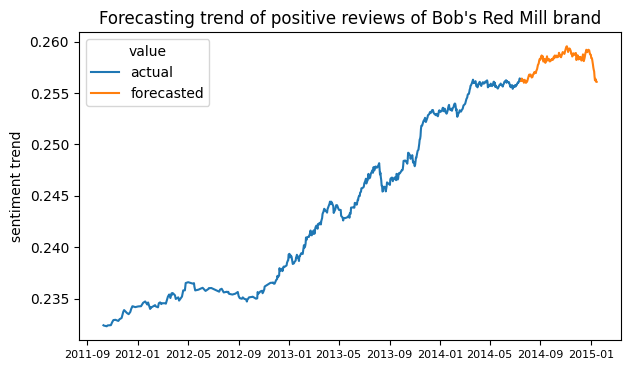

In [ ]:
# Plotting the trend of forecasted data
decomp=seasonal_decompose(df3['score'],period=365)

trend3=pd.DataFrame(decomp.trend)
trend3['value']=df3['value']

plt.figure(figsize=(7,4))
sns.lineplot(data=trend3,x=trend3.index,y='trend',hue='value')
plt.xticks(fontsize=8)
plt.ylabel('sentiment trend')
plt.title('Forecasting trend of positive reviews of Bob\'s Red Mill brand')
plt.show()

**Observations :**
- In the Grocery and Gourmet Food category too, positive reviews have an increasing trend.

- SARIMA model was used to forecast the trends in positive review counts of the category.

- The trend is forecasted to stay drop for the next 90 days in the year 2014.

- The trend for the most reviewed brand in this  category, Bob's Red Mill, appears to increase further for the next 3 months.


### Negative forecasting :

In [ ]:
# Filtering data by category and sentiment type, then grouping them by reviewTime
ggf_neg=data[data['set'].eq('ggf') & data['sentiment'].eq('Negative')].groupby('reviewTime')['polarity'].mean()
ggf_neg

reviewTime
2004-05-26   -0.100000
2004-12-04   -0.010000
2005-09-15   -0.010000
2005-09-16   -0.270000
2005-11-21   -0.030000
                ...   
2014-07-19   -0.190000
2014-07-20   -0.033333
2014-07-21   -0.096667
2014-07-22   -0.170000
2014-07-23   -0.100000
Name: polarity, Length: 2254, dtype: float64

In [ ]:
# Verifying the continuity of dates
check_dates(data=ggf_neg)

Start date :  2004-05-26 
End date   :  2014-07-23

No. of missing dates : 1457

These dates are : 
DatetimeIndex(['2004-05-27', '2004-05-28', '2004-05-29', '2004-05-30',
               '2004-05-31', '2004-06-01', '2004-06-02', '2004-06-03',
               '2004-06-04', '2004-06-05',
               ...
               '2011-05-15', '2011-05-29', '2011-07-05', '2011-09-25',
               '2012-01-05', '2012-01-22', '2012-06-23', '2012-07-14',
               '2012-09-04', '2013-07-15'],
              dtype='datetime64[ns]', length=1457, freq=None)

The dates are in order, regardless of the missing dates.


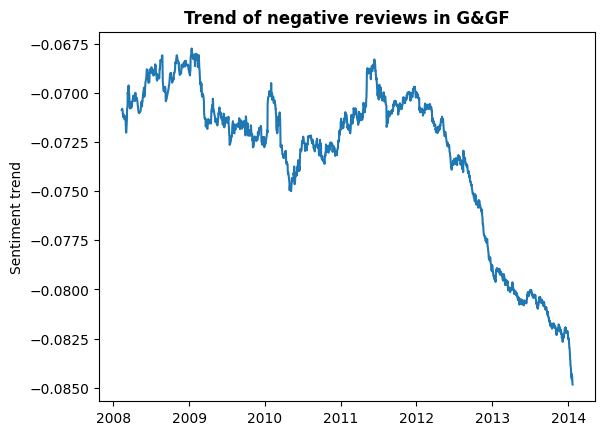

In [ ]:
# Ploting the yearly trend of sentiment
z=seasonal_decompose(ggf_neg,period=365)

plt.plot(z.trend)
plt.ylabel('Sentiment trend')
plt.title('Trend of negative reviews in G&GF',fontweight='bold')
plt.show()

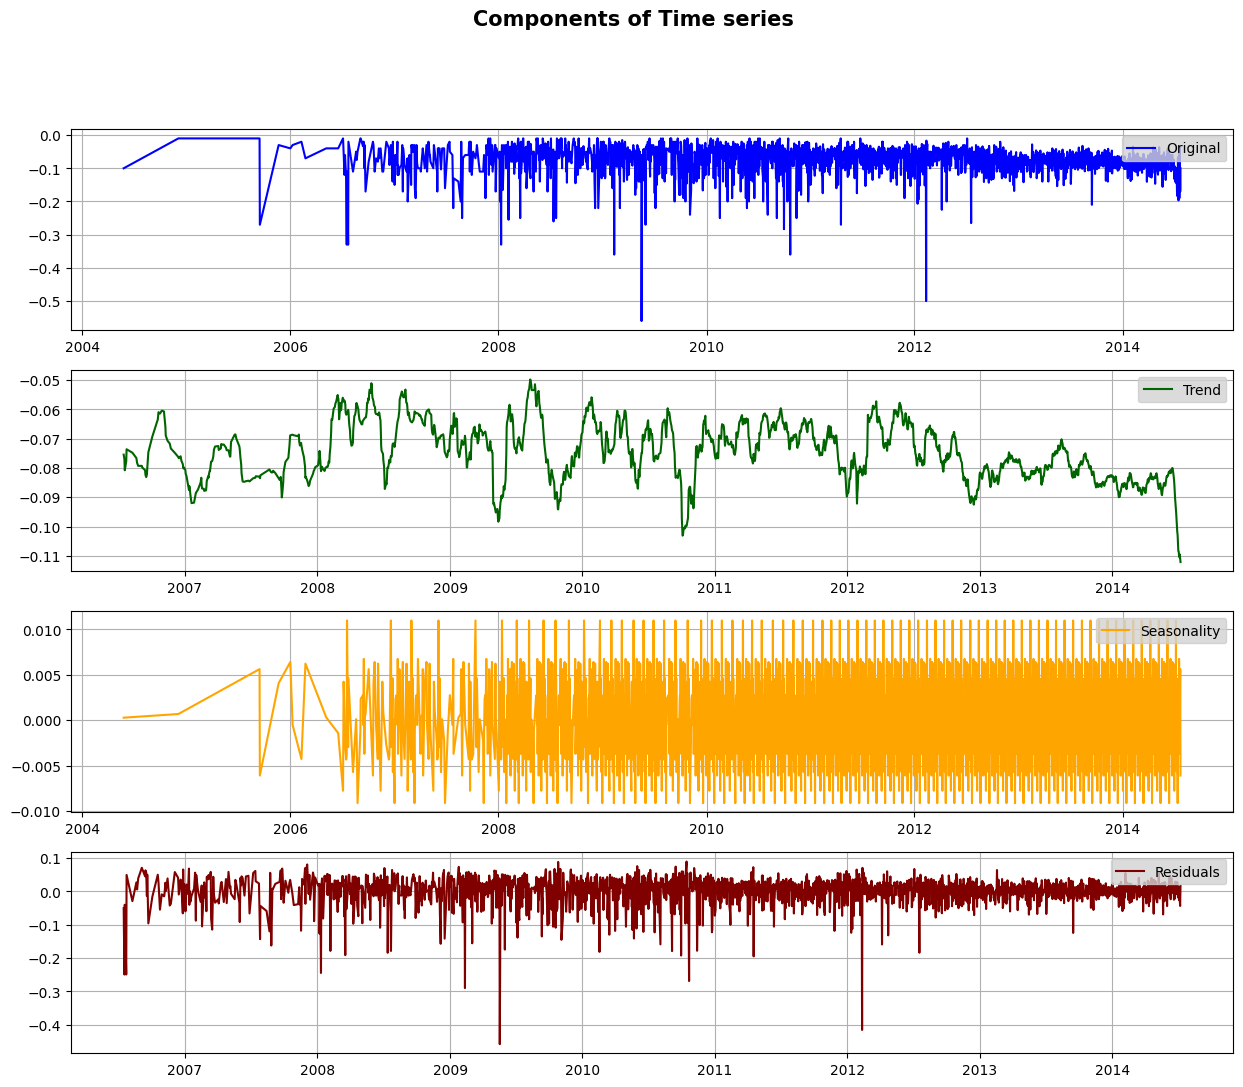

In [ ]:
# Visualizing components of the time series data : monthly
ts_decomposition(ggf_neg,period=30)

In [ ]:
# Splitting the data into train and test
train_g2,test_g2=ts_train_test_split(ggf_neg,train_ratio=0.9)

In [ ]:
# Stationarity check
result,a=stationary_check(train_g2,alpha=0.05)
result

'The data is stationary. Modelling can be done on it.'

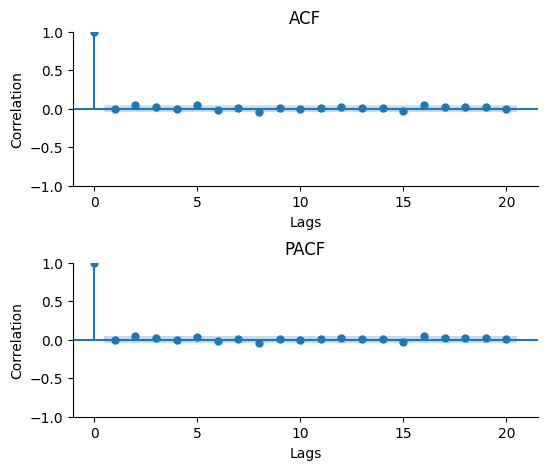

In [ ]:
# Plotting the correlograms to find p,q values
correlograms(train_g2,lags=20)

In [ ]:
# Auto arima to set optimal values of p,d,q and P,D,Q
m1 = auto_arima(train_g2,start_p=1,max_p=3,start_q=1, max_q=3,
                start_P=1,max_P=3,start_Q=1,max_Q=3,
                m=12, seasonal=True, trace=True,stationary=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=11.84 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-5993.814, Time=0.43 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-5991.455, Time=5.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-5991.404, Time=2.38 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-3739.142, Time=0.11 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-5993.451, Time=2.42 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-5993.400, Time=1.14 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=12.16 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-5991.817, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-5991.816, Time=0.52 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-5989.828, Time=1.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 37.449 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:    

In [ ]:
# Building SARIMA model
p=2; q=1; d=1
neg_model_ggf = sm.tsa.statespace.SARIMAX(train_g2,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()

print(neg_model_ggf.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           polarity   No. Observations:                 2029
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                3400.643
Date:                            Mon, 02 Oct 2023   AIC                          -6787.287
Time:                                    05:00:53   BIC                          -6748.025
Sample:                                         0   HQIC                         -6772.876
                                           - 2029                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0060      0.021     -0.293      0.770      -0.046       0.034
ar.L2          0.0439      0.021   

In [ ]:
# Predicting
pred = neg_model_ggf.predict(start=0,end=len(test_g2)-1)

In [ ]:
# Displaying actual and predicted values
result_ts=pd.DataFrame(test_g2)
result_ts['predicted']=pred.values
result_ts.rename(columns={'polarity':'actual'},inplace=True)
result_ts

,actual,predicted
reviewTime,,
2013-12-11,-0.080000,0.000000
2013-12-12,-0.100909,-0.100000
2013-12-13,-0.090909,-0.010000
2013-12-14,-0.062727,-0.010000
2013-12-15,-0.107273,-0.270000
...,...,...
2014-07-19,-0.190000,-0.068526
2014-07-20,-0.033333,-0.069436
2014-07-21,-0.096667,-0.066055


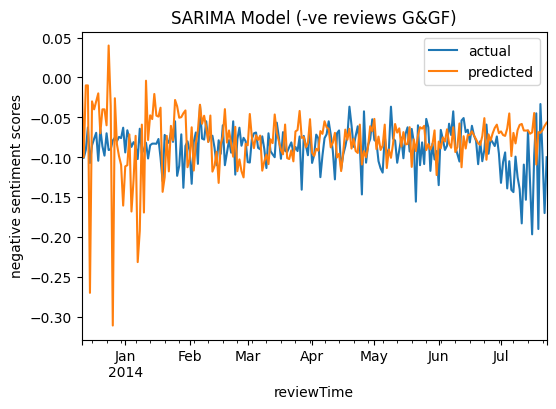

In [ ]:
# Plotting the results
result_ts.plot(kind='line',title='SARIMA Model (-ve reviews G&GF)',ylabel='negative sentiment scores',figsize=(6,4))
plt.show()

,score,value
2004-05-26,-0.100000,actual
2004-12-04,-0.010000,actual
2015-07-23,-0.079837,forecasted
2015-07-24,-0.081837,forecasted


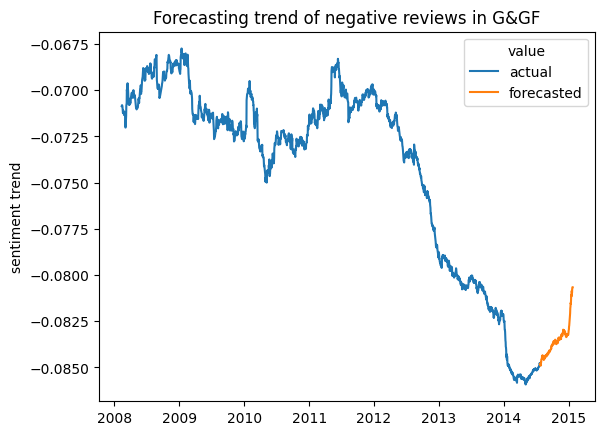

In [ ]:
# Forecasting trend
df=ts_forecast(neg_model_ggf,subset=ggf_neg,days=365)

display(pd.concat([df.head(2),df.tail(2)],axis=0))
print('\n\n')

decomp=seasonal_decompose(df['score'],period=365)

trend=pd.DataFrame(decomp.trend)
trend['value']=df['value']

sns.lineplot(data=trend,x=trend.index,y='trend',hue='value')
plt.ylabel('sentiment trend')
plt.title('Forecasting trend of negative reviews in G&GF')
plt.show()

In [ ]:
# Forecasting for brand
brand='Bob&#39;s Red Mill'

subset4=data[data['brand'].eq(brand) & data['sentiment'].eq('Negative')].groupby('reviewTime')['polarity'].mean()
subset4

reviewTime
2006-12-04   -0.02
2007-07-28   -0.11
2008-07-04   -0.01
2008-10-26   -0.05
2008-11-07   -0.09
              ... 
2014-05-25   -0.21
2014-05-26   -0.02
2014-06-08   -0.04
2014-06-09   -0.08
2014-07-07   -0.14
Name: polarity, Length: 173, dtype: float64

In [ ]:
# Appending forcasted values to original data and labelling them
df4=ts_forecast(neg_model_ggf,subset=subset4,days=90)

pd.concat([df4.head(2),df4.tail(2)],axis=0)

,score,value
2006-12-04,-0.020000,actual
2007-07-28,-0.110000,actual
2014-10-05,-0.080728,forecasted
2014-10-06,-0.077698,forecasted


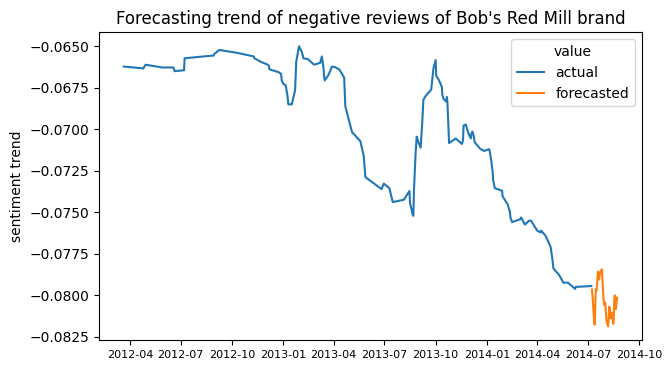

In [ ]:
# Plotting the trend of forecasted data
decomp=seasonal_decompose(df4['score'],period=90)

trend4=pd.DataFrame(decomp.trend)
trend4['value']=df4['value']

plt.figure(figsize=(7,4))
sns.lineplot(data=trend4,x=trend4.index,y='trend',hue='value')
plt.xticks(fontsize=8)
plt.ylabel('sentiment trend')
plt.title('Forecasting trend of negative reviews of Bob\'s Red Mill brand')
plt.show()

**Observations :**
- In the Grocery and Gourmet Food category, the negative reviews have an increasing trend.

- SARIMA model was used to forecast the trends in review counts of the category. The trend appears to decrease for the next few months.

- The trend for most reviewed brand in this category, Bob's Red Mill, appears to increase for the next 3 months .
